In [1]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import talib 
from dateutil.relativedelta import relativedelta
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

from Tool_v1 import *


# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
yf.pdr_override()

In [2]:
start="2020-12-31"
end="2022-12-31"
name="AAPL"

#MACD619RSI21_8020
stock_data=pct_change(name,start,end)
stock_data=stock_data.copy()

#指标运算
stock_data=MACD_short(stock_data)
stock_data=RSI(stock_data)
stock_data=RSI_MACD(stock_data,21,80,20)
stock_data= my_rsi(stock_data, 21)

stock_data = stock_data.dropna()

#y值
#stock_data["y"]=np.where(stock_data['Close'].shift(-1) > stock_data['Close'],1,-1)

num_columns = stock_data.shape[1]+1
print(num_columns)

22


In [3]:
variables=stock_data.loc[:,["re_close", "re_open", "my_rsi", "Position", "RSI6", "up_or_down"]]
variables.head()

,re_close,re_open,my_rsi,Position,RSI6,up_or_down
Date,,,,,,
2021-02-03,0.152778,0.995366,0.454127,-1,44.554311,1
2021-02-04,0.996443,0.608544,0.526673,-1,57.238698,1
2021-02-05,0.576920,0.955133,0.486111,-1,54.506235,1
2021-02-08,0.975489,0.544116,0.517102,-1,55.118427,0
2021-02-09,0.078812,0.379305,0.465740,-1,50.250064,1


[[ 1.         -0.56403116  0.15919097  0.1815953   0.41208053  0.08996742]
 [-0.56403116  1.         -0.24190323 -0.23094201 -0.41658763  0.00302813]
 [ 0.15919097 -0.24190323  1.          0.33078603  0.67498125  0.18031809]
 [ 0.1815953  -0.23094201  0.33078603  1.          0.69728343  0.25396454]
 [ 0.41208053 -0.41658763  0.67498125  0.69728343  1.          0.39471749]
 [ 0.08996742  0.00302813  0.18031809  0.25396454  0.39471749  1.        ]]


<AxesSubplot:>

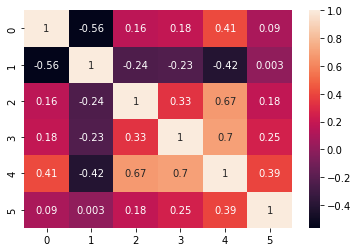

In [4]:
cor = np.corrcoef(variables.T)
print(cor)
sns.heatmap(cor, annot=True)

In [5]:
lr = LogisticRegression()

X = stock_data.loc[:,["re_close", "re_open", "my_rsi", "Position", "RSI21"]].values
#Y = stock_data.loc[:,["up_or_down"]].values.ravel()
Y = np.where(stock_data['Open'].shift(-1) > stock_data['Open'],1,-1)
#Y = np.where(stock_data['Close'].shift(-1) > stock_data['Close'],1,-1)

#X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)

split = int(0.8*len(stock_data))
X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]

In [6]:
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
f1_score(y_pred, Y_test)

0.7954545454545454

In [7]:
print(lr.score(X_test,Y_test))

0.8144329896907216


In [8]:

X = stock_data.iloc[:,:num_columns]
st_x= StandardScaler()  
X= st_x.fit_transform(X)  
    
#split dataset
split = int(0.7*len(stock_data))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    
# # 设置正则化类型（L1, L2, Elastic Net）
# penalty = 'l2' 

# # 设置正则化强度（C）
# C = 0.005

# #logistic regression
# model = LogisticRegression(penalty =penalty, C=C) 

#logistic regression
model = LogisticRegression(max_iter=20000)
model = model.fit (X_train,y_train)
probability = model.predict_proba(X_test)
predicted = model.predict(X_test)
    
# get importance
importance = model.coef_[0]
print(importance)
# summarize feature importance
count=0
for i in importance:
    print('Score:%.d %.5f' % (count,i))
    count+=1
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)

plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), range(len(importance)))
plt.show()
    
#result
#print(metrics.classification_report(y_test, predicted))
#print(metrics.confusion_matrix(y_test, predicted)) 
print("model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))

ValueError: could not convert string to float: '跌'